In [24]:
import pandas as pd
import numpy as np

# Different possible regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.dummy import DummyRegressor

# Other process packages
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
# import statsmodels

# Model scoring and assessment packages
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import shap

# Model optimization packages
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

# Visualization packages
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import plotly.graph_objects as go

In [25]:
X_train = pd.read_csv('xtrain.csv',
index_col=0)
X_test = pd.read_csv('xtest.csv',
index_col=0)
y_train = pd.read_csv('ytrain.csv',
index_col=0)
y_test = pd.read_csv('ytest.csv',
index_col=0)

print(X_train.shape, X_test.shape)

(1384, 28) (346, 28)


In [39]:
new_best_model_rfr = RandomForestRegressor(max_depth=24, 
                                    max_features=18,
                                    n_estimators=135,
                                    random_state=0,
                                    n_jobs = -1,
                                    )

In [40]:
new_best_model_rfr.fit(X_train, y_train)

df_compare = X_test.copy()
df_compare['target'] = y_test
df_compare['prediction'] = new_best_model_rfr.predict(X_test)
df_compare['delta'] = df_compare['prediction'] - df_compare['target']
df_compare = df_compare.assign(entry=range(1, len(df_compare)+1))
df_compare

/Users/joschw/opt/anaconda3/envs/milestone2/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,quant__Estimate!!HOUSING OCCUPANCY!!Total housing units,quant__Estimate!!HOUSING OCCUPANCY!!Total housing units!!Occupied housing units,quant__Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 2020 or later,quant__Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 2010 to 2019,quant__Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 2000 to 2009,quant__Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1990 to 1999,quant__Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1980 to 1989,quant__Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1970 to 1979,quant__Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1960 to 1969,quant__Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1950 to 1959,...,quant__closest_wind_x_pressure_div_distance_,cat__housing_cluster_0,cat__housing_cluster_1,cat__econ_cluster_0.0,cat__econ_cluster_1.0,cat__econ_cluster_nan,target,prediction,delta,entry
1320,0.130215,0.108432,0.000000,0.000000,0.028027,0.034257,0.017649,0.014997,0.017179,0.011234,...,0.060350,1.0,0.0,1.0,0.0,0.0,8.218248,5.894288,-2.323960,1
1465,0.266229,0.235025,0.000000,0.000000,0.038934,0.040385,0.037213,0.038664,0.033976,0.028703,...,0.018474,1.0,0.0,1.0,0.0,0.0,2.564949,2.329474,-0.235475,2
1056,0.211305,0.180202,0.000000,0.007317,0.037450,0.039531,0.047610,0.044288,0.020166,0.010729,...,0.022544,1.0,0.0,0.0,1.0,0.0,1.098612,0.974621,-0.123991,3
478,0.051249,0.040889,0.000000,0.000000,0.002310,0.008170,0.011410,0.010180,0.007380,0.004250,...,0.011894,1.0,0.0,1.0,0.0,0.0,1.098612,0.896130,-0.202482,4
423,0.473646,0.384175,0.004102,0.026420,0.067793,0.088055,0.138800,0.085153,0.025556,0.022462,...,0.012189,1.0,0.0,1.0,0.0,0.0,2.772589,3.509237,0.736648,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,0.628620,0.554073,0.014704,0.097995,0.101780,0.067635,0.079155,0.075717,0.045170,0.059140,...,0.002001,1.0,0.0,1.0,0.0,0.0,2.890372,2.119482,-0.770889,342
161,0.209207,0.186640,0.000000,0.000000,0.020192,0.039017,0.038843,0.038721,0.030369,0.019498,...,0.037656,1.0,0.0,1.0,0.0,0.0,5.337538,4.019726,-1.317812,343
113,0.054983,0.038983,0.000000,0.000000,0.004133,0.009458,0.010939,0.013359,0.008840,0.003801,...,0.014653,1.0,0.0,1.0,0.0,0.0,0.000000,1.446641,1.446641,344
1108,0.124074,0.100318,0.000000,0.000246,0.024462,0.031044,0.021372,0.019732,0.011534,0.011248,...,0.055959,1.0,0.0,0.0,1.0,0.0,5.075174,4.837019,-0.238155,345


In [41]:
explainer = shap.Explainer(new_best_model_rfr, X_train)


In [42]:
shap_vals = explainer(X_test, check_additivity=False)


 96%|=================== | 333/346 [00:20<00:00]       

In [43]:
df_compare = X_test.copy()
df_compare['target'] = y_test
df_compare['prediction'] = new_best_model_rfr.predict(X_test)
df_compare['delta'] = df_compare['prediction'] - df_compare['target']
df_compare = df_compare.assign(entry=range(1, len(df_compare)+1))
df_compare

,quant__Estimate!!HOUSING OCCUPANCY!!Total housing units,quant__Estimate!!HOUSING OCCUPANCY!!Total housing units!!Occupied housing units,quant__Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 2020 or later,quant__Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 2010 to 2019,quant__Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 2000 to 2009,quant__Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1990 to 1999,quant__Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1980 to 1989,quant__Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1970 to 1979,quant__Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1960 to 1969,quant__Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1950 to 1959,...,quant__closest_wind_x_pressure_div_distance_,cat__housing_cluster_0,cat__housing_cluster_1,cat__econ_cluster_0.0,cat__econ_cluster_1.0,cat__econ_cluster_nan,target,prediction,delta,entry
1320,0.130215,0.108432,0.000000,0.000000,0.028027,0.034257,0.017649,0.014997,0.017179,0.011234,...,0.060350,1.0,0.0,1.0,0.0,0.0,8.218248,5.894288,-2.323960,1
1465,0.266229,0.235025,0.000000,0.000000,0.038934,0.040385,0.037213,0.038664,0.033976,0.028703,...,0.018474,1.0,0.0,1.0,0.0,0.0,2.564949,2.329474,-0.235475,2
1056,0.211305,0.180202,0.000000,0.007317,0.037450,0.039531,0.047610,0.044288,0.020166,0.010729,...,0.022544,1.0,0.0,0.0,1.0,0.0,1.098612,0.974621,-0.123991,3
478,0.051249,0.040889,0.000000,0.000000,0.002310,0.008170,0.011410,0.010180,0.007380,0.004250,...,0.011894,1.0,0.0,1.0,0.0,0.0,1.098612,0.896130,-0.202482,4
423,0.473646,0.384175,0.004102,0.026420,0.067793,0.088055,0.138800,0.085153,0.025556,0.022462,...,0.012189,1.0,0.0,1.0,0.0,0.0,2.772589,3.509237,0.736648,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,0.628620,0.554073,0.014704,0.097995,0.101780,0.067635,0.079155,0.075717,0.045170,0.059140,...,0.002001,1.0,0.0,1.0,0.0,0.0,2.890372,2.119482,-0.770889,342
161,0.209207,0.186640,0.000000,0.000000,0.020192,0.039017,0.038843,0.038721,0.030369,0.019498,...,0.037656,1.0,0.0,1.0,0.0,0.0,5.337538,4.019726,-1.317812,343
113,0.054983,0.038983,0.000000,0.000000,0.004133,0.009458,0.010939,0.013359,0.008840,0.003801,...,0.014653,1.0,0.0,1.0,0.0,0.0,0.000000,1.446641,1.446641,344
1108,0.124074,0.100318,0.000000,0.000246,0.024462,0.031044,0.021372,0.019732,0.011534,0.011248,...,0.055959,1.0,0.0,0.0,1.0,0.0,5.075174,4.837019,-0.238155,345


In [44]:
df_compare[df_compare['delta'].abs()>4]


,quant__Estimate!!HOUSING OCCUPANCY!!Total housing units,quant__Estimate!!HOUSING OCCUPANCY!!Total housing units!!Occupied housing units,quant__Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 2020 or later,quant__Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 2010 to 2019,quant__Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 2000 to 2009,quant__Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1990 to 1999,quant__Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1980 to 1989,quant__Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1970 to 1979,quant__Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1960 to 1969,quant__Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1950 to 1959,...,quant__closest_wind_x_pressure_div_distance_,cat__housing_cluster_0,cat__housing_cluster_1,cat__econ_cluster_0.0,cat__econ_cluster_1.0,cat__econ_cluster_nan,target,prediction,delta,entry
986,0.184489,0.153437,0.000000,0.006897,0.058431,0.048604,0.029987,0.020033,0.008173,0.006070,...,0.063387,1.0,0.0,1.0,0.0,0.0,0.000000,4.539651,4.539651,23
1340,0.696475,0.607432,0.000000,0.000000,0.045059,0.087667,0.098614,0.130271,0.120411,0.094553,...,0.003495,1.0,0.0,1.0,0.0,0.0,7.005789,2.986907,-4.018882,51
204,0.699892,0.611031,0.016901,0.113410,0.164752,0.132506,0.104980,0.074340,0.038407,0.031959,...,0.004130,1.0,0.0,1.0,0.0,0.0,0.000000,4.120132,4.120132,53
97,0.042122,0.029346,0.000000,0.000000,0.014933,0.008329,0.006393,0.003772,0.002588,0.002787,...,0.009944,1.0,0.0,1.0,0.0,0.0,6.594413,1.285758,-5.308655,105
958,0.703636,0.651289,0.017384,0.113624,0.129828,0.098790,0.128615,0.090156,0.050559,0.041933,...,0.000937,1.0,0.0,1.0,0.0,0.0,1.386294,5.838211,4.451917,121
794,0.614441,0.474228,0.020660,0.064536,0.135016,0.093291,0.146772,0.100337,0.035801,0.014424,...,0.003217,1.0,0.0,1.0,0.0,0.0,6.431331,1.653076,-4.778255,259


In [52]:
row_958 = explainer(X_test.loc[958])
row_97 = explainer(X_test.loc[97])
row_986 = explainer(X_test.loc[986])


In [53]:
shap.initjs()
shap.plots.force(row_958)

In [54]:
shap.plots.force(row_97)


In [55]:
shap.plots.force(row_986)


In [59]:
df_compare[df_compare['delta'].abs()<.1].sort_values(by='delta',
                                                    ascending=True)


,quant__Estimate!!HOUSING OCCUPANCY!!Total housing units,quant__Estimate!!HOUSING OCCUPANCY!!Total housing units!!Occupied housing units,quant__Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 2020 or later,quant__Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 2010 to 2019,quant__Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 2000 to 2009,quant__Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1990 to 1999,quant__Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1980 to 1989,quant__Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1970 to 1979,quant__Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1960 to 1969,quant__Estimate!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1950 to 1959,...,quant__closest_wind_x_pressure_div_distance_,cat__housing_cluster_0,cat__housing_cluster_1,cat__econ_cluster_0.0,cat__econ_cluster_1.0,cat__econ_cluster_nan,target,prediction,delta,entry
843,0.057331,0.052236,0.004564,0.015567,0.007430,0.007810,0.009862,0.002972,0.004935,0.001716,...,0.006897,1.0,0.0,1.0,0.0,0.0,2.197225,2.100122,-0.097103,37
446,0.369483,0.283450,0.000000,0.000000,0.082568,0.127643,0.079589,0.051345,0.017769,0.004968,...,0.004227,1.0,0.0,1.0,0.0,0.0,1.945910,1.856909,-0.089001,61
1190,0.339870,0.294806,0.000000,0.000829,0.030497,0.062565,0.043653,0.061377,0.047144,0.046438,...,0.012580,1.0,0.0,1.0,0.0,0.0,2.397895,2.321642,-0.076253,142
830,0.163352,0.137519,0.000493,0.018346,0.025289,0.042416,0.028306,0.023352,0.006545,0.006450,...,0.021518,1.0,0.0,1.0,0.0,0.0,3.988984,3.921524,-0.067461,216
705,0.097651,0.085935,0.000000,0.000000,0.006431,0.021209,0.024900,0.019248,0.012737,0.005847,...,0.005146,1.0,0.0,1.0,0.0,0.0,1.098612,1.034631,-0.063981,108
1523,0.156837,0.130620,0.000000,0.000000,0.005507,0.022873,0.027780,0.029776,0.026403,0.019471,...,0.011339,1.0,0.0,1.0,0.0,0.0,3.218876,3.156220,-0.062656,292
1321,0.154521,0.123955,0.000000,0.000000,0.009587,0.019388,0.021149,0.027754,0.025865,0.017570,...,0.009247,1.0,0.0,1.0,0.0,0.0,1.386294,1.335116,-0.051179,192
167,0.151015,0.126586,0.000000,0.000000,0.007436,0.020147,0.024774,0.028054,0.025443,0.018393,...,0.006170,1.0,0.0,1.0,0.0,0.0,2.197225,2.181154,-0.016071,243
1372,0.130985,0.110032,0.000000,0.000000,0.006284,0.017567,0.021909,0.023380,0.023852,0.015668,...,0.008753,1.0,0.0,1.0,0.0,0.0,1.386294,1.389009,0.002715,168
1401,0.161914,0.141502,0.000000,0.000000,0.009704,0.025859,0.028745,0.028688,0.024204,0.016636,...,0.018432,1.0,0.0,1.0,0.0,0.0,2.890372,2.897303,0.006931,64


In [60]:
row_1372 = explainer(X_test.loc[1372])
shap.plots.force(row_1372)


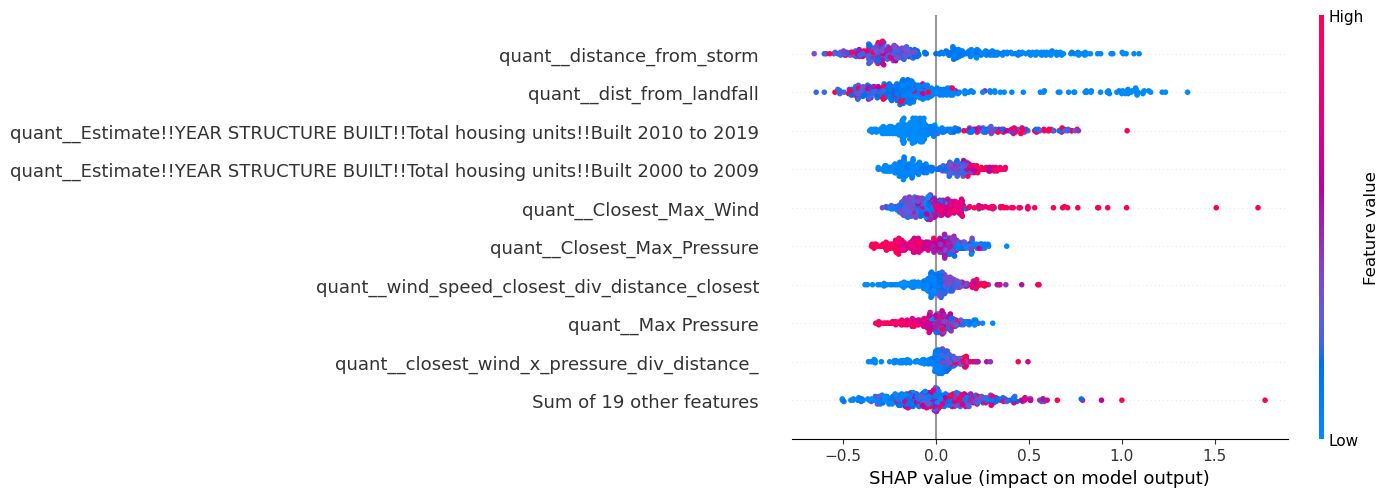

In [61]:
shap.plots.beeswarm(shap_vals)